In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()

In [11]:
#Categorical Features: DictVectorizer, OneHotEncoder, FeatureHasher
data =  [{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
        {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
        {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
        {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]

from sklearn.feature_extraction import DictVectorizer
#non-CSR
vec = DictVectorizer(sparse = False, dtype = int)
display(vec.fit_transform(data))
display(vec.get_feature_names())

#CSR
vec = DictVectorizer(sparse = True, dtype = int)
display(vec.fit_transform(data))

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features = 5, dtype = int)
arr = fh.fit_transform(data)
print(arr.toarray())
fh.get_params()

[[      0       0       0 -850001      -4]
 [      1       0       0 -700000      -3]
 [      0      -1       0 -650000      -3]
 [      1       0       0 -600000      -2]]


{'alternate_sign': True, 'dtype': int, 'input_type': 'dict', 'n_features': 5}

In [29]:
#Text Features
sample = ['problem of evil', 'evil queen', 'horizon problem']

#By RAW Word Count
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
display(pd.DataFrame(X.toarray(), columns = vec.get_feature_names()))

#By Term Frequency-Inverse Document Frequency (TF-IDF) which measures percentage frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns = vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


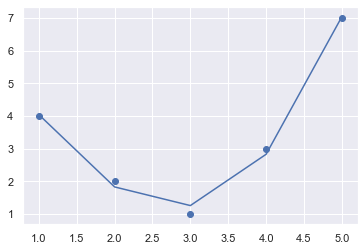

In [34]:
#Derived Features to increase Model Complexity by varying the inputs. Not changing the model, but transforming the inputs
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
X = x[:, np.newaxis]
poly = PolynomialFeatures(degree = 3, include_bias = False)
X2 = poly.fit_transform(X)
model = LinearRegression().fit(X2, y)
y_pred = model.predict(X2)
plt.scatter(X, y)
plt.plot(X, y_pred)

In [43]:
#Imputation of Missing Values
from numpy import nan
X = np.array([[ nan, 0,   3  ], [ 3,   7,   9  ], [ 3,   5,   2  ], [ 4,   nan, 6  ], [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

from sklearn.impute import SimpleImputer
impt = SimpleImputer(strategy = 'most_frequent')
X2 = impt.fit_transform(X); X2

array([[3., 0., 3.],
       [3., 7., 9.],
       [3., 5., 2.],
       [4., 0., 6.],
       [8., 8., 1.]])

In [45]:
#Wrapping everything in one line: Feature Pipeline
from numpy import nan
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
X = np.array([[ nan, 0,   3  ], [ 3,   7,   9  ], [ 3,   5,   2  ], [ 4,   nan, 6  ], [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(strategy = 'mean'), 
                      PolynomialFeatures(degree = 3, include_bias = False), 
                      LinearRegression())
model.fit(X, y)
X2 = model.predict(X); X2

array([14., 16., -1.,  8., -5.])